# This notbook use the superbowl data to do some data exploration to practice pandas. 

The superbowl data is a small dataset from kaggle: https://www.kaggle.com/timoboz/superbowl-history-1967-2020#superbowl.csv

In [30]:
# import libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
# import data
super_bowl = pd.read_csv(r"C:\Users\flai\superbowl.csv")
super_bowl.head()


,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


We can see taht there are Date, SuperBowl title, Winner name, Winner points, Loser name, Loser points, Most waluable Player, Stadium name, City and State in the columes. In order to know the entries, we use info()

In [9]:
super_bowl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
Date          54 non-null object
SB            54 non-null object
Winner        54 non-null object
Winner Pts    54 non-null int64
Loser         54 non-null object
Loser Pts     54 non-null int64
MVP           54 non-null object
Stadium       54 non-null object
City          54 non-null object
State         54 non-null object
dtypes: int64(2), object(8)
memory usage: 4.3+ KB


So there are totally 54 entries, and no missing data in the dataset. We drop the SB column since it is just a title for the superbowl event. 

In [17]:
super_bowl.drop(['SB'],axis=1,inplace=True)
super_bowl.head()

,Date,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


Now let's find the best winner team who won the most times of event. 

In [65]:
winner_counts = super_bowl.groupby('Winner').count().sort_values(by="City",ascending=False)
winner_counts

,Date,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
Winner,,,,,,,,
Pittsburgh Steelers,6,6,6,6,6,6,6,6
New England Patriots,6,6,6,6,6,6,6,6
Dallas Cowboys,5,5,5,5,5,5,5,5
San Francisco 49ers,5,5,5,5,5,5,5,5
Green Bay Packers,4,4,4,4,4,4,4,4
New York Giants,4,4,4,4,4,4,4,4
Washington Redskins,3,3,3,3,3,3,3,3
Denver Broncos,3,3,3,3,3,3,3,3
Kansas City Chiefs,2,2,2,2,2,2,2,2


New England Patriots, Pittsburg Steelers and Dallas Cowboys are the three strongest teams! Now, let's plot visualize the winners.

Text(0.5,1,'Super Bowl Winners')

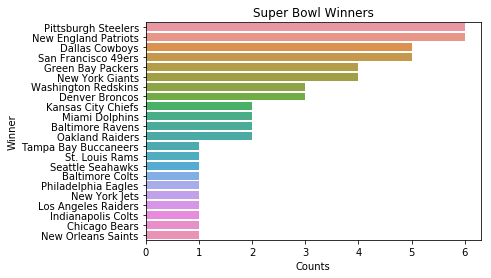

In [66]:
winner_counts.reset_index(inplace = True)
winner_counts.rename(columns={"Date":"Counts"},inplace = True)
sns.barplot(x="Counts", y="Winner",data=winner_counts,orient="h").set_title("Super Bowl Winners")

In [67]:
loser_counts = super_bowl.groupby('Loser').count().sort_values(by = "City", ascending=False)
loser_counts

,Date,Winner,Winner Pts,Loser Pts,MVP,Stadium,City,State
Loser,,,,,,,,
Denver Broncos,5,5,5,5,5,5,5,5
New England Patriots,5,5,5,5,5,5,5,5
Buffalo Bills,4,4,4,4,4,4,4,4
Minnesota Vikings,4,4,4,4,4,4,4,4
Miami Dolphins,3,3,3,3,3,3,3,3
Dallas Cowboys,3,3,3,3,3,3,3,3
Atlanta Falcons,2,2,2,2,2,2,2,2
Seattle Seahawks,2,2,2,2,2,2,2,2
San Francisco 49ers,2,2,2,2,2,2,2,2


Text(0.5,1,'Super Bowl losers')

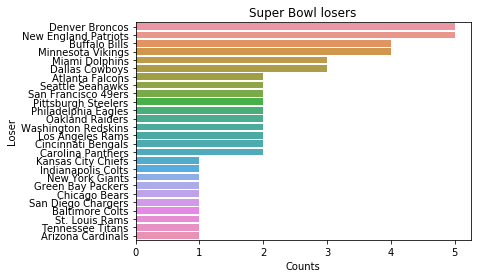

In [70]:
loser_counts.reset_index(inplace = True)
loser_counts.rename(columns={"Date":"Counts"},inplace = True)
loser_counts
sns.barplot(x="Counts", y="Loser",data=loser_counts,orient="h").set_title("Super Bowl losers")

Interestingly, New England Patriots ranked No.1 among the teams who lost games in the final. That make me want to see the ranking of the teams who appear in the final. That would be the sum of the winner and loser, let me think how to do this...

In [31]:
winners = super_bowl.Winner
losers = super_bowl.Loser
teams = pd.concat([winners,losers])
teams

0       Kansas City Chiefs
1     New England Patriots
2      Philadelphia Eagles
3     New England Patriots
4           Denver Broncos
5     New England Patriots
6         Seattle Seahawks
7         Baltimore Ravens
8          New York Giants
9        Green Bay Packers
10      New Orleans Saints
11     Pittsburgh Steelers
12         New York Giants
13      Indianapolis Colts
14     Pittsburgh Steelers
15    New England Patriots
16    New England Patriots
17    Tampa Bay Buccaneers
18    New England Patriots
19        Baltimore Ravens
20          St. Louis Rams
21          Denver Broncos
22          Denver Broncos
23       Green Bay Packers
24          Dallas Cowboys
25     San Francisco 49ers
26          Dallas Cowboys
27          Dallas Cowboys
28     Washington Redskins
29         New York Giants
              ...         
24     Pittsburgh Steelers
25      San Diego Chargers
26           Buffalo Bills
27           Buffalo Bills
28           Buffalo Bills
29           Buffalo Bills
3

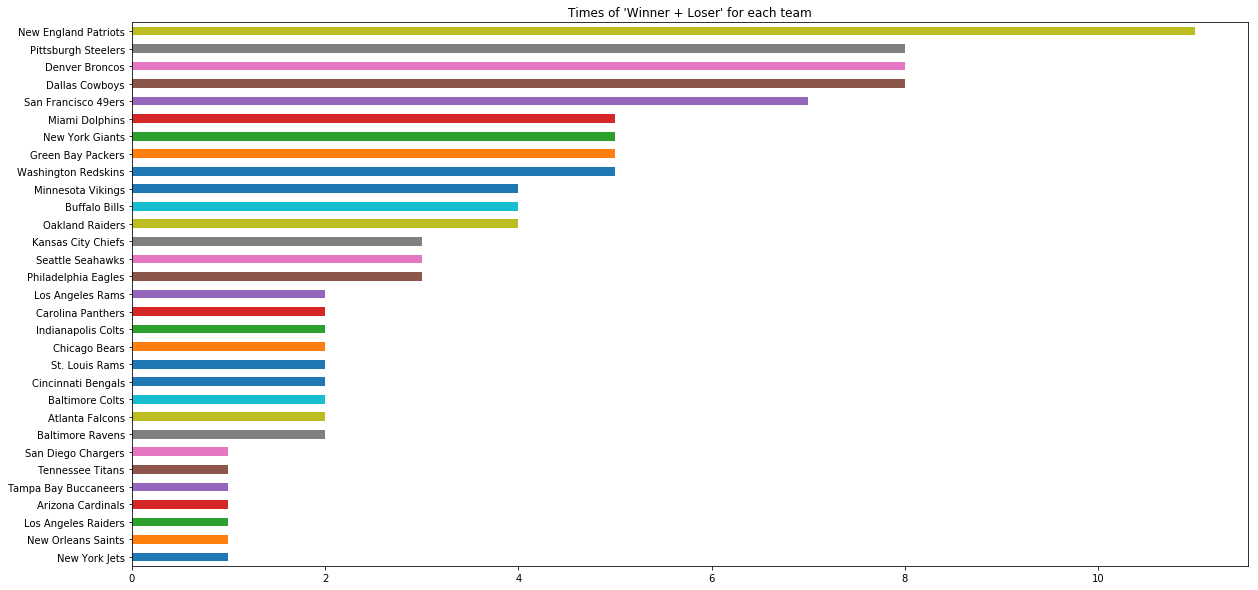

In [76]:
counts = teams.value_counts().sort_values(ascending=True)
counts
plt.figure(figsize=(20,10))
counts.plot(kind="barh",title="Times of 'Winner + Loser' for each team")
plt.show()

Now, let's take a look at the MVP.

In [79]:
MVP_counts = super_bowl.groupby("MVP").count().sort_values(by="City",ascending=False)
MVP_counts

,Date,Winner,Winner Pts,Loser,Loser Pts,Stadium,City,State
MVP,,,,,,,,
Tom Brady,4,4,4,4,4,4,4,4
Joe Montana+,3,3,3,3,3,3,3,3
Bart Starr+,2,2,2,2,2,2,2,2
Terry Bradshaw+,2,2,2,2,2,2,2,2
Eli Manning,2,2,2,2,2,2,2,2
Patrick Mahomes,1,1,1,1,1,1,1,1
Len Dawson+,1,1,1,1,1,1,1,1
Lynn Swann+,1,1,1,1,1,1,1,1
Malcolm Smith,1,1,1,1,1,1,1,1


Now,let's visualize the MVP. 

Text(0.5,1,'Super Bowl MVP')

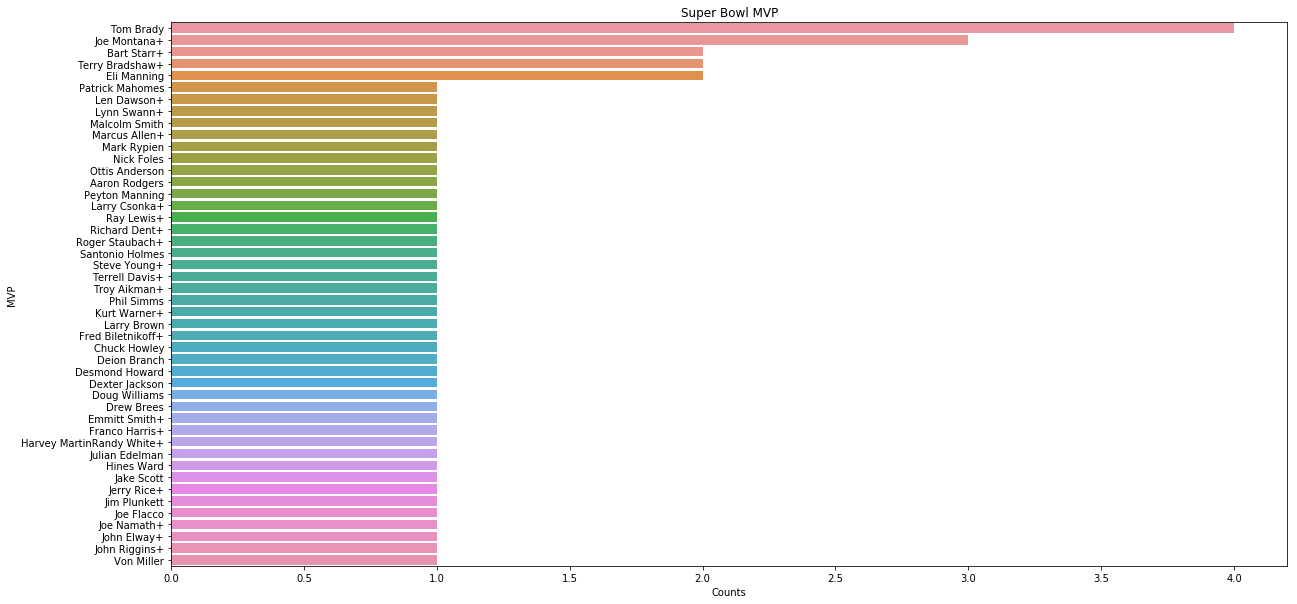

In [81]:
MVP_counts.reset_index(inplace = True)
MVP_counts.rename(columns={"Date":"Counts"},inplace = True)
MVP_counts
plt.figure(figsize=(20,10))
sns.barplot(x="Counts", y="MVP",data=MVP_counts,orient="h").set_title("Super Bowl MVP")